In [1]:
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
import os
import numpy as np


def load_data(folder):
    images = []
    for file in tqdm(os.listdir(folder)):
        file_id = file.replace('.png', '')
        image = Image.open(
            os.path.join(folder, file)
        ).convert('LA').resize((256, 256))
        arr = np.array(image)
        images.append(
            (int(file_id), arr)
        )
    images.sort(key=lambda i: i[0])
    return np.array([v for _id, v in images])



x_train = load_data('train')
y_train = pd.read_csv('y_train.csv')['infection']

  0%|          | 0/487 [00:00<?, ?it/s]

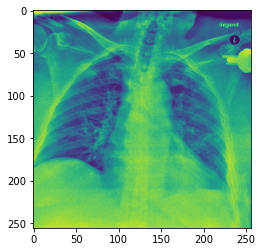

In [2]:
# check image 
import matplotlib.pyplot as plt
plt.imshow(x_train[0, :, :, 0])

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build():
    img_in = Input(shape=(256, 256, 2))
    flattened = Flatten()(img_in)
    fc1 = Dense(64)(flattened)
    #fc1 = Dropout(0.3)(fc1)
    fc2 = Dense(32)(fc1)
    #fc2 = Dropout(0.3)(fc2)
    output = Dense(1, activation = 'sigmoid')(fc2)
    model = tf.keras.Model(inputs=img_in, outputs=output)
    return model


model = build()
model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        )

model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 2)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8388672   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 8,390,785
Trainable params: 8,390,785
Non-trainable params: 0
_________________________________________________________________


In [4]:
epochs = 30
batch_size = 64

history = model.fit(x = x_train,
                    y = y_train,
                    batch_size = batch_size,
                    validation_split=0.3,
                    epochs=epochs
                    )

Epoch 1/30
6/6 [==============================] - 3s 160ms/step - loss: 26478.6171 - binary_accuracy: 0.5441 - auc: 0.4968 - val_loss: 63595.2852 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 2/30
6/6 [==============================] - 0s 42ms/step - loss: 57385.7628 - binary_accuracy: 0.6350 - auc: 0.4933 - val_loss: 42585.2969 - val_binary_accuracy: 0.3469 - val_auc: 0.5000
Epoch 3/30
6/6 [==============================] - 0s 50ms/step - loss: 27629.1590 - binary_accuracy: 0.4221 - auc: 0.4721 - val_loss: 17919.0059 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 4/30
6/6 [==============================] - 0s 40ms/step - loss: 10695.3823 - binary_accuracy: 0.6496 - auc: 0.5384 - val_loss: 3055.0879 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 5/30
6/6 [==============================] - 0s 48ms/step - loss: 4795.5346 - binary_accuracy: 0.6849 - auc: 0.5020 - val_loss: 8455.6611 - val_binary_accuracy: 0.3537 - val_auc: 0.5052
Epoch 6/30
6/6 [=====================

In [5]:
x_test = load_data('test')

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission.csv', index=False)



  0%|          | 0/210 [00:00<?, ?it/s]